**Linear Regression**

*Regresi linier adalah metode pendekatan sebagai kajian terhadap ketergantungan satu variable, yaitu antara variable terikat Y dan satau atau lebih variable bebas yang disebut X - Gujarati (2009)*

**Simple Regression** hanya mempunyai 1 variable bebas (x), sedangkan **Multiple Regression** mempunyai 2 atau lebih variable bebas(Y).

Persamaan Simple Regression
y = mx + b + e


*   y = variable terikat
*   m = sloe dari garis(sebuah garis)
*   x = variable bebas
*   b = intercept
*   e = error

Persamaan Multiple Regression
Y = b + e + m1(x1)+ m2(x2) + .... + mn*xn

*   Y = variable terikat
*   mn = koefisien dari persamaan
*   xn = variable bebas
*   b = intercept
*   e = error




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
dataset_kangkung = pd.read_csv("/content/sonicbloom.csv")
dataset_kangkung.tail()

,no,t_dangdut,t_jazz,t_murottal,t_nomusik,waktu,hari ke,hari real
955,956,25.0,28.0,NaN,NaN,14:52,panen,25
956,957,25.0,28.0,NaN,NaN,15:00,panen,25
957,958,25.0,28.0,NaN,NaN,15:08,panen,25
958,959,25.0,28.0,NaN,NaN,15:16,panen,25
959,960,25.0,28.0,NaN,NaN,15:24,panen,25


In [3]:
dataset_kangkung.shape

(960, 8)

In [4]:
dataset_kangkung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          960 non-null    int64  
 1   t_dangdut   960 non-null    float64
 2   t_jazz      960 non-null    float64
 3   t_murottal  0 non-null      float64
 4   t_nomusik   0 non-null      float64
 5   waktu       960 non-null    object 
 6   hari ke     960 non-null    object 
 7   hari real   960 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 60.1+ KB


In [5]:
dataset_kangkung.describe()

,no,t_dangdut,t_jazz,t_murottal,t_nomusik,hari real
count,960.000000,960.000000,960.000000,0.0,0.0,960.000000
mean,480.500000,13.878646,13.762500,NaN,NaN,18.000000
std,277.272429,6.282796,7.531328,NaN,NaN,4.322746
min,1.000000,6.000000,5.000000,NaN,NaN,11.000000
25%,240.750000,8.000000,6.500000,NaN,NaN,14.000000
50%,480.500000,12.000000,12.000000,NaN,NaN,18.000000
75%,720.250000,20.500000,20.500000,NaN,NaN,22.000000
max,960.000000,25.000000,28.000000,NaN,NaN,25.000000


In [6]:
dataset_kangkung.isnull().sum()

no              0
t_dangdut       0
t_jazz          0
t_murottal    960
t_nomusik     960
waktu           0
hari ke         0
hari real       0
dtype: int64

**Exploratory Data Analysis (EDA)**

In [7]:
dataset_kangkung.head()

,no,t_dangdut,t_jazz,t_murottal,t_nomusik,waktu,hari ke,hari real
0,1,6.0,5.0,NaN,NaN,7:00,ke-1,11
1,2,6.0,5.0,NaN,NaN,7:08,ke-1,11
2,3,6.0,5.0,NaN,NaN,7:16,ke-1,11
3,4,6.0,5.0,NaN,NaN,7:24,ke-1,11
4,5,6.0,5.0,NaN,NaN,7:32,ke-1,11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


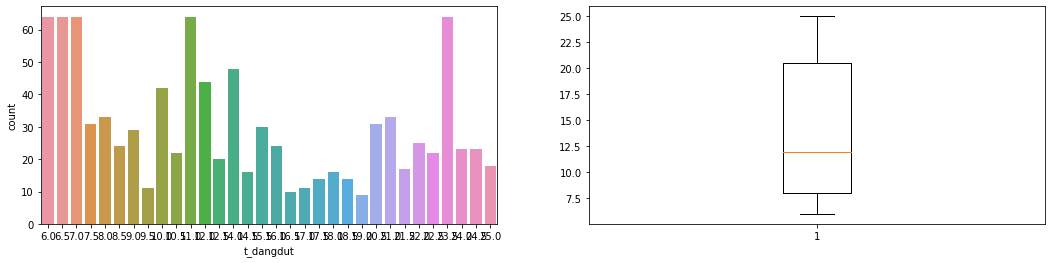

In [12]:
#Melihat distribusi dari tinggi jazz
f = plt.figure(figsize=(18,4))

f.add_subplot(1,2,1)
sns.countplot(dataset_kangkung['t_dangdut'])

f.add_subplot(1,2,2)
plt.boxplot(dataset_kangkung['t_dangdut'])
plt.show()

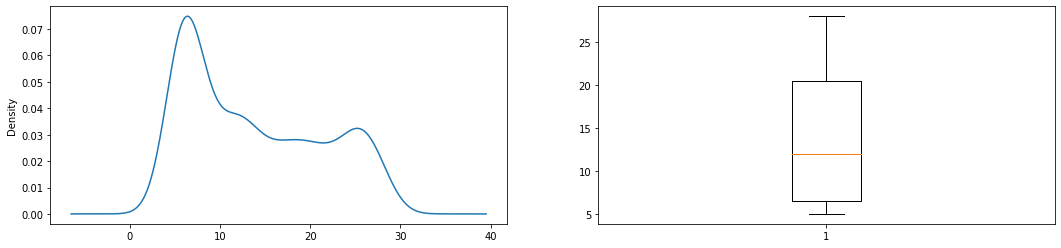

In [15]:
#Melihat distribusi dari tinggi dangdut
f = plt.figure(figsize=(18,4))

f.add_subplot(1,2,1)
dataset_kangkung['t_jazz'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(dataset_kangkung['t_jazz'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

<Figure size 720x576 with 0 Axes>

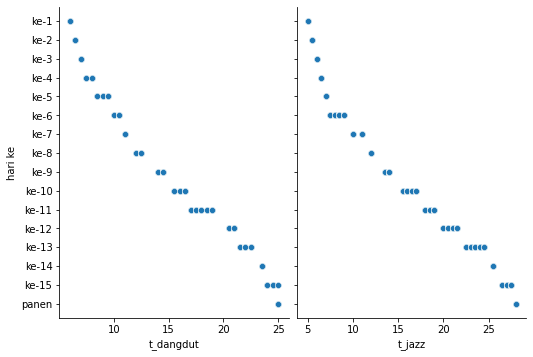

In [18]:
#melihat hubungan antara variable kontrol dan bebas menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=dataset_kangkung, x_vars=['t_dangdut','t_jazz'], y_vars=['hari ke'], size=5, aspect=0.75)
plt.show

In [46]:
#melihat korelasi dari variable kontrol dan bebas
dataset_kangkung.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,no,t_dangdut,t_jazz,t_murottal,t_nomusik,hari real
no,1.00,0.98,0.98,nan,nan,1.00
t_dangdut,0.98,1.00,1.00,nan,nan,0.98
t_jazz,0.98,1.00,1.00,nan,nan,0.98
t_murottal,nan,nan,nan,nan,nan,nan
t_nomusik,nan,nan,nan,nan,nan,nan
hari real,1.00,0.98,0.98,nan,nan,1.00


In [73]:
#recall dataset 
df = dataset_kangkung
df = df.drop(columns=['no','waktu','hari ke','t_murottal','t_nomusik'])
df

,t_dangdut,t_jazz,hari real
0,6.0,5.0,11
1,6.0,5.0,11
2,6.0,5.0,11
3,6.0,5.0,11
4,6.0,5.0,11
...,...,...,...
955,25.0,28.0,25
956,25.0,28.0,25
957,25.0,28.0,25
958,25.0,28.0,25


In [74]:
#membuat variable x dan y
x = df.drop(columns=['hari real'])
y = df['hari real']

In [75]:
#spliting data menjadi training dan tes dengan rasio 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [76]:
#cek shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 2)
(192, 2)
(768,)
(192,)


In [77]:
lg = LinearRegression()
#training model dengan menggunakan data yang sudah di partisi
lg.fit(x_train, y_train)

LinearRegression()

In [78]:
#mencari tau nilai slope/koefisien (m) dan intercept(b)
print(lg.coef_)
print(lg.intercept_)

[ 1.02418765 -0.29025889]
7.776533636781243


In [79]:
#buat hasil coef dan intercept kedalam dataframe
coef_dict = {
    'features': x.columns,
    'coef_value': lg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,t_dangdut,1.024188
1,t_jazz,-0.290259


In [80]:
y_pred = lg.predict(x_test)

In [81]:
#mengetahui nilai akurasi dari model yang sudah ditraining
lg.score(x_test, y_test)

0.970853244157209

In [84]:
#coba prediksi
lg.predict([[22.0,22.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([23.9229664])